🔹 First 5 Rows:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

🔹 Missing Values:
Hours     0
Scores    0
dtype: int64

🔹 Dataset Summary:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


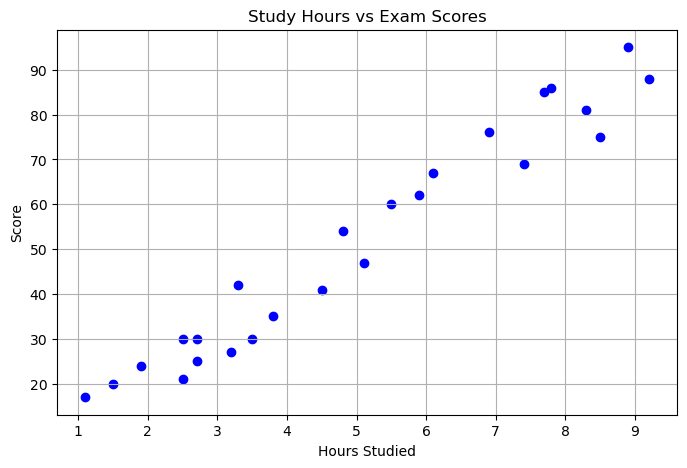

In [8]:
# 🎓 Student Score Prediction using Linear & Polynomial Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("student_scores.csv")

# EDA
print("🔹 First 5 Rows:")
print(data.head())

print("\n🔹 Missing Values:")
print(data.isnull().sum())

print("\n🔹 Dataset Summary:")
print(data.describe())

plt.figure(figsize=(8, 5))
plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Train/Test split
X = data[['Hours']]
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


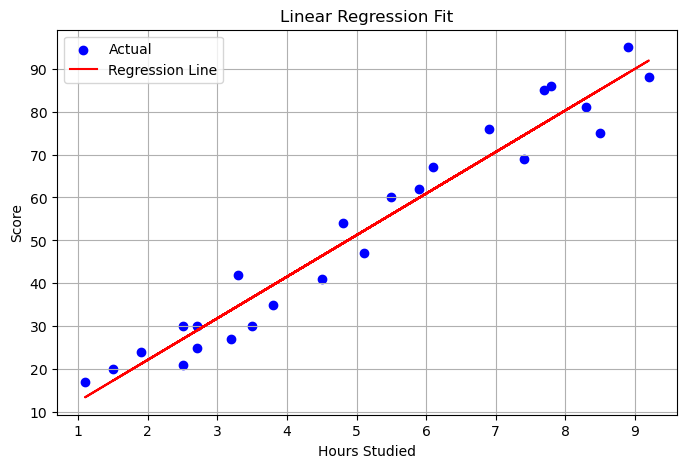

📊 Evaluation Metrics (Test Set):
Mean Absolute Error (MAE): 3.92
Mean Squared Error (MSE): 18.94
R2 Score: 0.97


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

line = model.coef_ * X + model.intercept_

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, line, color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print("📊 Evaluation Metrics (Test Set):")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


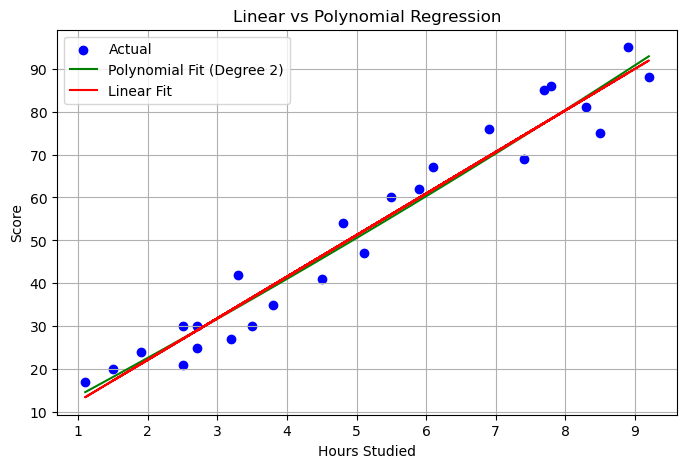

📊 Polynomial Regression (Degree 2):
MAE: 4.19
MSE: 21.07
R² Score: 0.96


In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Degree 2 Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions using Polynomial model
y_poly_pred = poly_model.predict(X_test)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual')

# Create curve with higher resolution
#X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100), columns=['Hours'])
plt.plot(X_range, poly_model.predict(X_range), color='green', label='Polynomial Fit (Degree 2)')
plt.plot(X, model.predict(X), color='red', label='Linear Fit')

plt.title('Linear vs Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
print("📊 Polynomial Regression (Degree 2):")
print(f"MAE: {mean_absolute_error(y_test, y_poly_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_poly_pred):.2f}")


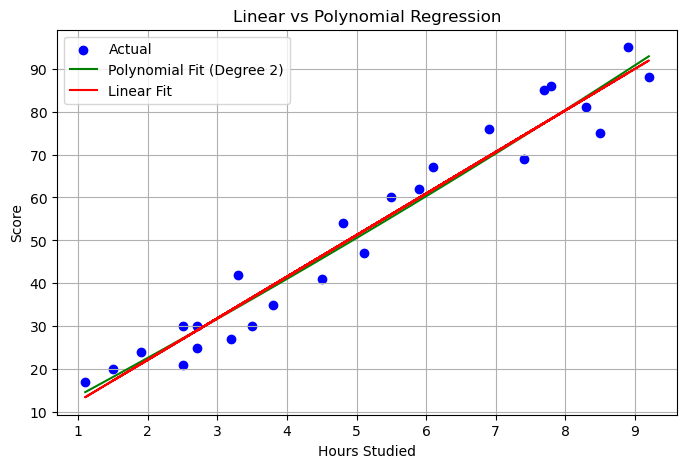

In [5]:
X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100), columns=['Hours'])

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_range, poly_model.predict(X_range), color='green', label='Polynomial Fit (Degree 2)')
plt.plot(X, model.predict(X), color='red', label='Linear Fit')

plt.title('Linear vs Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## ✅ Conclusion

- **Linear Regression** is simple and provides a decent prediction.
- **Polynomial Regression (degree 2)** shows better curve fitting and slightly improved accuracy.
- Evaluation metrics like MAE, MSE, and R² help us quantify performance.
- This kind of analysis is useful in real-world student performance prediction or basic ML modeling tasks.

📌 Customized by Saad ur Rahman | ML Enthusiast | NED University  
